# Business Understanding

## Project Domain

Proyek ini berfokus pada analisis sentimen menggunakan dataset yang mencakup berbagai tweet atau teks yang relevan dengan COVID-19. Dataset ini mencakup tweet terkait COVID-19 yang dikategorikan berdasarkan sentimen (positif, negatif, netral, dan ekstrem). Tujuan dari proyek ini adalah untuk mengidentifikasi dan menganalisis sentimen publik terhadap pandemi COVID-19 dengan tujuan memahami lebih baik dampak sosial, psikologis, dan persepsi publik terhadap situasi yang berkembang.

## Problem Statements


*   Analisis Sentimen yang Akurat: Identifikasi sentimen masyarakat dari tweet atau teks terkait COVID-19 secara akurat. Ini termasuk sentimen yang lebih kompleks seperti ekstrem positif atau ekstrem negatif, yang bisa lebih sulit untuk dianalisis.
*   Pemahaman Dampak Sosial dan Psikologis: Pandemi COVID-19 mempengaruhi banyak aspek kehidupan masyarakat. Bagaimana masyarakat merasakan dampak ini melalui media sosial, dan bagaimana respon mereka terhadap kebijakan atau tindakan pemerintah
*   Meningkatkan Pengambilan Keputusan Berdasarkan Sentimen Publik: Pemerintah dan organisasi kesehatan perlu memahami sentimen publik untuk merancang kebijakan atau program yang lebih efektif.





## Goals



*   Mengklasifikasikan Sentimen: Membangun model machine learning yang dapat secara otomatis mengklasifikasikan sentimen tweet terkait COVID-19 menjadi kategori seperti positif, negatif, netral, dan ekstrem.
*   Identifikasi Wawasan untuk Tindakan: Memberikan wawasan yang dapat membantu organisasi kesehatan atau pemerintah dalam merumuskan langkah-langkah untuk menangani ketidakpuasan masyarakat atau meningkatkan komunikasi yang lebih efektif.
*   Penyempurnaan Sistem Pemantauan: Mengembangkan sistem yang dapat digunakan untuk secara otomatis memantau dan menganalisis sentimen media sosial secara real-time.







## Solutions Statements


*   Model Prediksi Sentimen: Menggunakan teknik NLP (Natural Language Processing) dan model machine learning seperti Random Forest, SVM, atau model berbasis deep learning (misalnya LSTM, BERT) untuk menganalisis teks tweet dan mengklasifikasikan sentimen secara otomatis.
*   Penggunaan Data Lain untuk Analisis yang Lebih Mendalam: Selain tweet, kita dapat menggabungkan data dari berita online atau laporan pemerintah untuk memberikan perspektif yang lebih luas tentang sentimen publik dan perkembangan situasi COVID-19.





# Data Understanding

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anggunnurullestari","key":"a04926aabd2687fd1edc43cfab32a5dd"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d datatattle/covid-19-nlp-text-classification

Dataset URL: https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification
License(s): copyright-authors


In [ ]:
!mkdir covid-19-nlp-text-classification
!unzip covid-19-nlp-text-classification
!ls covid-19-nlp-text-classification

Archive:  covid-19-nlp-text-classification.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


## Import Library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('/content/Corona_NLP_test.csv')

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


<ipython-input-10-71a6932807d4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='Set2')


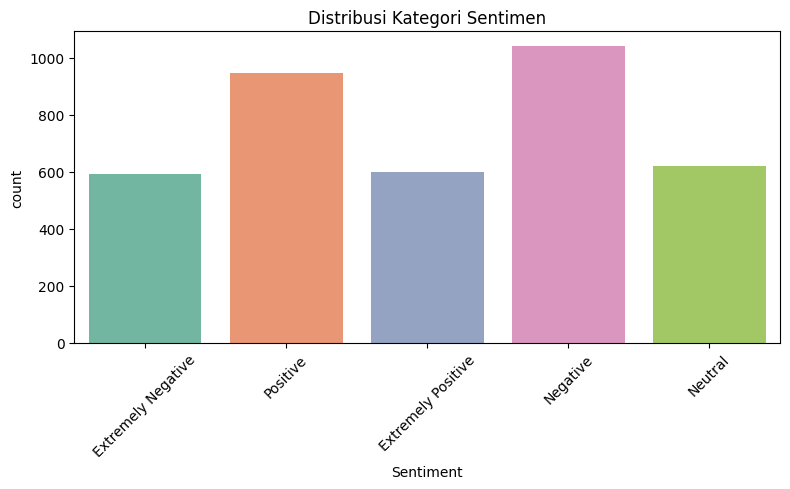

In [ ]:
# Bar Plot
Sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Distribusi Kategori Sentimen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

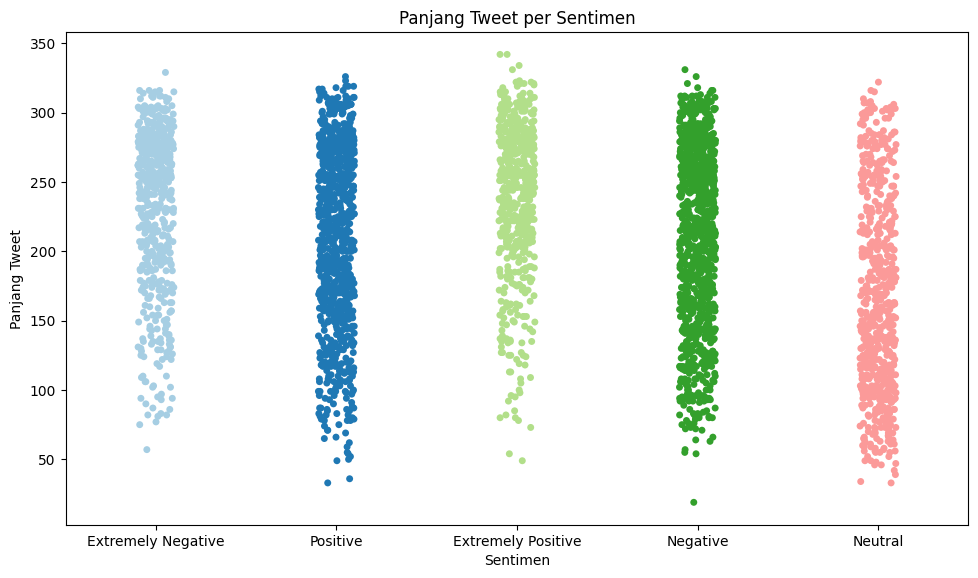

In [ ]:
 #Scatter Plot

df['TweetLength'] = df['OriginalTweet'].apply(len)


plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='Sentiment', y='TweetLength', hue='Sentiment',
              jitter=True, alpha=1.0 , palette='Paired', dodge=False, legend=False)
plt.title('Panjang Tweet per Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Panjang Tweet')

plt.tight_layout(pad=1.5)
plt.show()

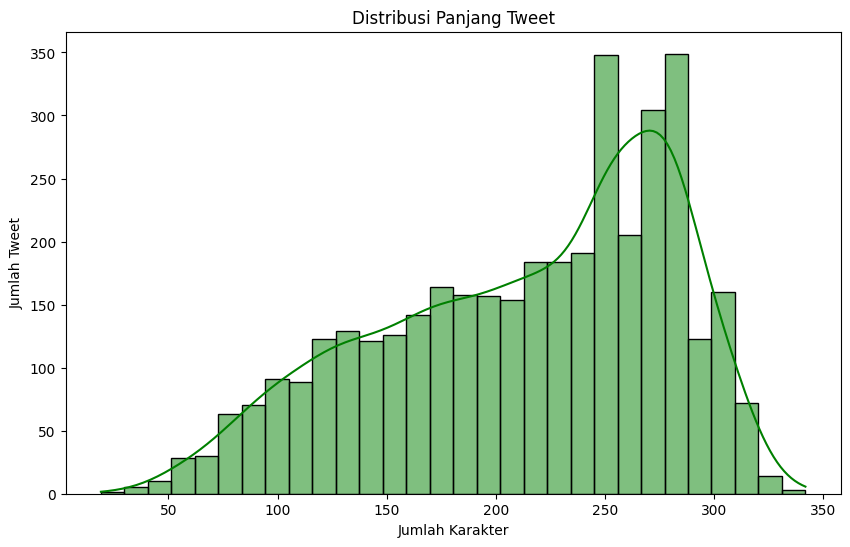

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['TweetLength'], bins=30, kde=True, color='green')
plt.title('Distribusi Panjang Tweet')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Jumlah Tweet')
plt.show()

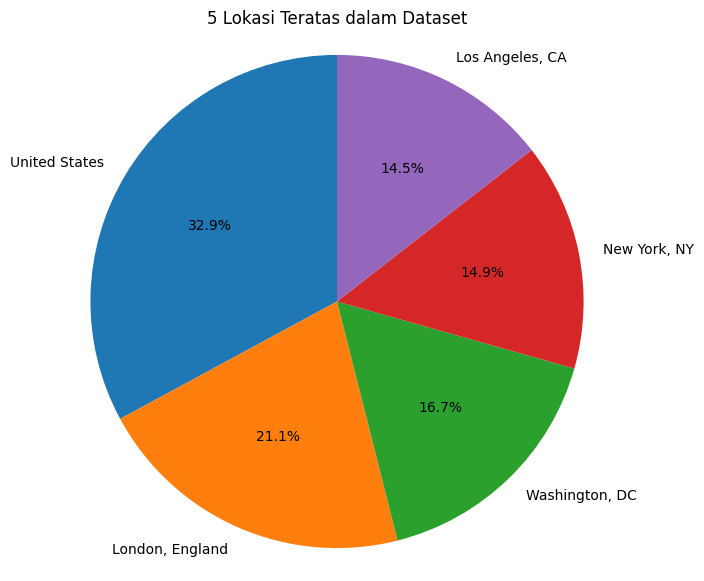

In [ ]:
# Pie Chart
top_locations = df['Location'].value_counts().dropna().head(5)

plt.figure(figsize=(7, 7))
plt.pie(top_locations.values, labels=top_locations.index, autopct='%1.1f%%', startangle=90)
plt.title('5 Lokasi Teratas dalam Dataset')
plt.axis('equal')
plt.show()

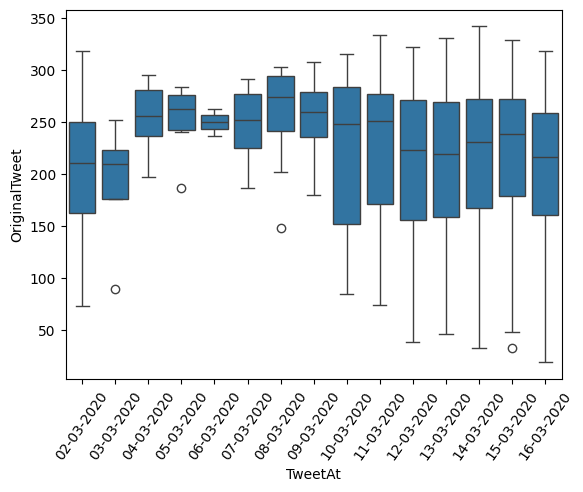

In [ ]:
# Box Plot
sns.boxplot(x=df['TweetAt'], y=df['OriginalTweet'].str.len(), data=df)
plt.xticks(rotation=55)
plt.show()

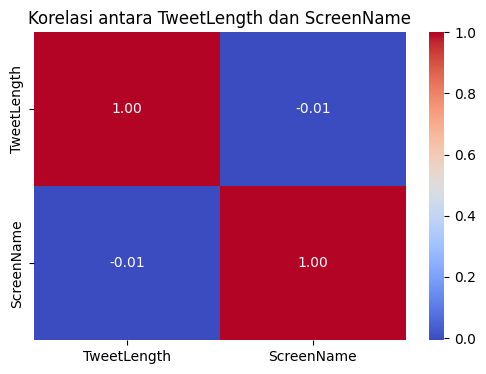

In [ ]:
# Heatmap
df['TweetLength'] = df['OriginalTweet'].str.len()
correlation = df[['TweetLength', 'ScreenName']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Korelasi antara TweetLength dan ScreenName')
plt.show()

# Data Preparation

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [392]:

# Drop unnecessary columns
# Check if the columns exist before dropping
columns_to_drop = ['UserName', 'ScreenName', 'Location', 'TweetAt']
for column in columns_to_drop:
    if column in df.columns:
        df = df.drop([column], axis=1)

# Handling missing values (if any)
df.dropna(inplace=True)

# Encode the sentiment labels
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

# Prepare the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = tfidf.fit_transform(df['OriginalTweet'])
y = df['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler(with_mean=False) # Use with_mean=False for sparse matrices
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

In [402]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

##Evaluation

In [403]:


# Assuming 'model' is your trained model (e.g., from a previous cell)
# Example using a simple RandomForestClassifier (replace with your actual model)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model: {accuracy * 200:.2f}%")


Accuracy of the model: 80.53%


In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

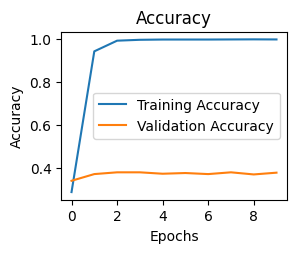

In [404]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

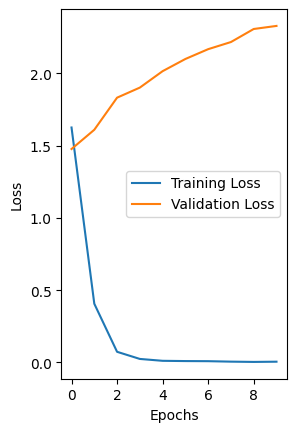

In [405]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Deployment

## Model Simulation

In [414]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the model: {accuracy * 100:.2f}%")


print(classification_report(y_test,y_pred))

# Example simulation with new data
# Create a new example tweet
new_tweet = ["COVID is very dangerous for everyone"]

# Transform the new tweet using the same TF-IDF vectorizer
new_tweet_tfidf = tfidf.transform(new_tweet)

# Scale the new tweet using the same scaler
new_tweet_scaled = scaler.transform(new_tweet_tfidf)

# Predict the sentiment for the new tweet
predicted_sentiment = model.predict(new_tweet_scaled)


# Inverse transform the predicted sentiment back to the original label
predicted_sentiment_label = le.inverse_transform(predicted_sentiment)

# Print the predicted sentiment
print(f"Predicted Sentiment: {predicted_sentiment_label[0]}")


Accuracy of the model: 40.26%
              precision    recall  f1-score   support

           0       0.56      0.22      0.31       115
           1       0.75      0.25      0.38       130
           2       0.35      0.55      0.43       212
           3       0.52      0.54      0.53       118
           4       0.31      0.37      0.34       185

    accuracy                           0.40       760
   macro avg       0.50      0.39      0.40       760
weighted avg       0.47      0.40      0.40       760

Predicted Sentiment: 3


# Saved Model

In [415]:

import joblib

# Save the model
filename = 'sentiment_analysis_model.sav'
joblib.dump(model, filename)

# Save the label encoder
filename_le = 'label_encoder.sav'
joblib.dump(le, filename_le)

# Save the TF-IDF vectorizer
filename_tfidf = 'tfidf_vectorizer.sav'
joblib.dump(tfidf, filename_tfidf)

# Save the scaler
filename_scaler = 'scaler.sav'
joblib.dump(scaler, filename_scaler)


#To download the saved model files
from google.colab import files
files.download('sentiment_analysis_model.sav')
files.download('label_encoder.sav')
files.download('tfidf_vectorizer.sav')
files.download('scaler.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [426]:


import joblib

# Assuming 'model' is your trained model
filename = 'sentiment_analysis_model.sav'
joblib.dump(model, filename, compress=3) # compress=3 provides a good balance between compression and speed


['sentiment_analysis_model.sav']

In [427]:


#To download the compressed saved model files
files.download('sentiment_analysis_model.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>